# Get the whole table from bulk data in CSV format

Import pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Imort table 101 "Avlagte doktorgrader aggregert"

In [2]:
df = pd.read_csv("https://api.nsd.no/dbhapitjener/Tabeller/bulk-csv?rptNr=101", sep=',')

Information about dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12529 entries, 0 to 12528
Data columns (total 15 columns):
Institusjonskode          12529 non-null int64
Institusjonsnavn          12529 non-null object
Avdelingskode             12529 non-null int64
Avdelingsnavn             12529 non-null object
Årstall                   12529 non-null int64
Semester                  12529 non-null int64
Semesternavn              12529 non-null object
Kvalifikasjonskode        12529 non-null object
Studieprogramkode         12529 non-null object
Programnavn               12529 non-null object
Finansieringskildekode    12529 non-null object
Finasieringskilde         12529 non-null object
Antall totalt             12529 non-null int64
Antall kvinner            12529 non-null int64
Antall menn               12529 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.4+ MB


Number of rows and columns

In [5]:
df.shape

(12529, 15)

Top of dataset

In [6]:
df.head()

,Institusjonskode,Institusjonsnavn,Avdelingskode,Avdelingsnavn,Årstall,Semester,Semesternavn,Kvalifikasjonskode,Studieprogramkode,Programnavn,Finansieringskildekode,Finasieringskilde,Antall totalt,Antall kvinner,Antall menn
0,211,Høgskolen i Bodø,0,HiBo (uspesifisert underenhet),2003,3,Vinter,DRBEDØK,DRGE,Fire-årig allmenlærerutdanning,EGEN,Andre eksternfinansierte,1,0,1
1,211,Høgskolen i Bodø,0,HiBo (uspesifisert underenhet),2005,1,Vinter,DRBEDØK,DRGE,Fire-årig allmenlærerutdanning,EGEN,Andre eksternfinansierte,1,0,1
2,211,Høgskolen i Bodø,0,HiBo (uspesifisert underenhet),2005,1,Vinter,DRGSOS,DRGE,Fire-årig allmenlærerutdanning,ANDRE,Andre eksternfinansierte,1,0,1
3,211,Høgskolen i Bodø,0,HiBo (uspesifisert underenhet),2005,3,Vinter,DRBEDØK,DRGE,Fire-årig allmenlærerutdanning,ANDRE,Andre eksternfinansierte,1,0,1
4,211,Høgskolen i Bodø,0,HiBo (uspesifisert underenhet),2005,3,Vinter,DRBEDØK,DRGE,Fire-årig allmenlærerutdanning,EGEN,Andre eksternfinansierte,1,0,1


Stacked bar 

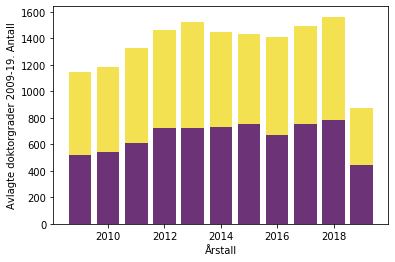

In [7]:
df_group = df.groupby(['Årstall'])['Antall kvinner','Antall menn'].sum().reset_index()
df_filter = df_group[df_group['Årstall'] >= 2009]
plt.bar(df_filter['Årstall'].tolist(), df_filter['Antall kvinner'].tolist(), color = "#6c3376")

# the second one is special to create stacked bar plots
plt.bar(df_filter['Årstall'].tolist(), df_filter['Antall menn'].tolist(),
bottom=df_filter['Antall kvinner'].tolist(), color = "#f3e151")

plt.xlabel('Årstall')  
plt.ylabel('Avlagte doktorgrader 2009-19. Antall')

plt.show() 